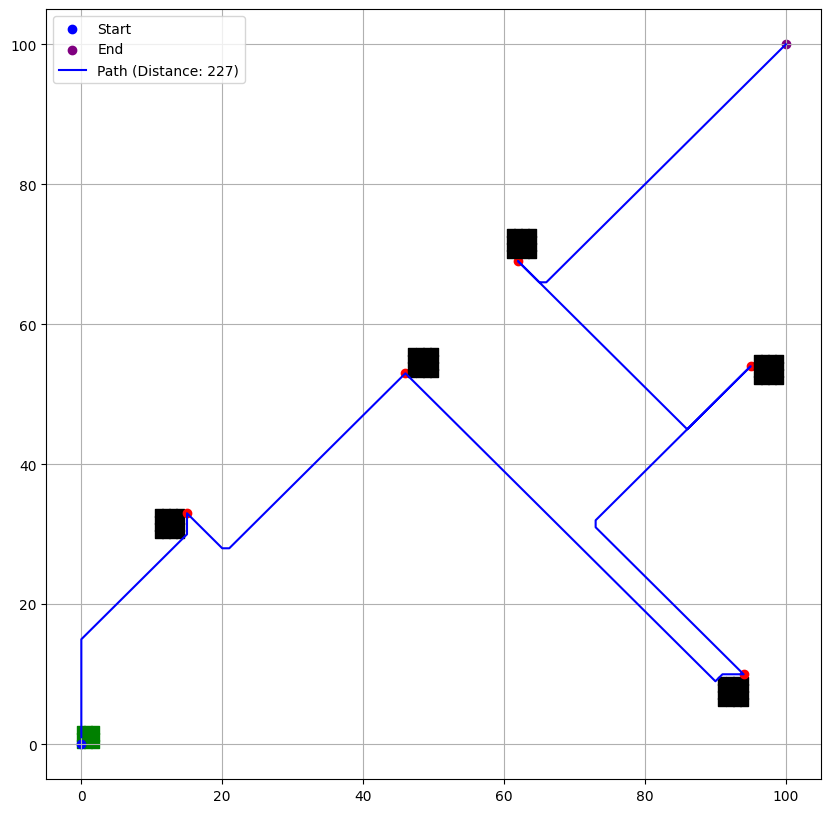

Total Distance Traveled: 227


In [5]:
import numpy as np
import matplotlib.pyplot as plt
import random
import heapq
from itertools import permutations

GRID_SIZE = 101
START = (0, 0)
END = (100, 100)
OBSTACLE_SIZE = 4
START_ZONE_RADIUS = 2
NUM_OBSTACLES = 5

def generate_grid():
    grid = np.zeros((GRID_SIZE, GRID_SIZE))

    # Mark the start zone
    for i in range(-START_ZONE_RADIUS, START_ZONE_RADIUS + 1):
        for j in range(-START_ZONE_RADIUS, START_ZONE_RADIUS + 1):
            if 0 <= START[0] + i < GRID_SIZE and 0 <= START[1] + j < GRID_SIZE:
                grid[START[0] + i, START[1] + j] = 1  # Mark green zone

    obstacles = []
    targets = []

    for _ in range(NUM_OBSTACLES):
        while True:
            x = random.randint(0, GRID_SIZE - OBSTACLE_SIZE - 1)
            y = random.randint(0, GRID_SIZE - OBSTACLE_SIZE - 1)

            if (x, y) == START or (x, y) == END:
                continue

            occupied = False
            for i in range(OBSTACLE_SIZE):
                for j in range(OBSTACLE_SIZE):
                    if grid[x + i, y + j] != 0:
                        occupied = True
                        break
            if occupied:
                continue

            # Place obstacle
            for i in range(OBSTACLE_SIZE):
                for j in range(OBSTACLE_SIZE):
                    grid[x + i, y + j] = -1  # Mark obstacle

            obstacles.append((x, y))

            # Place target randomly on one side of the obstacle
            side = random.choice(["top", "bottom", "left", "right"])
            if side == "top":
                target = (x + random.randint(0, OBSTACLE_SIZE - 1), y + OBSTACLE_SIZE)
            elif side == "bottom":
                target = (x + random.randint(0, OBSTACLE_SIZE - 1), y - 1)
            elif side == "left":
                target = (x - 1, y + random.randint(0, OBSTACLE_SIZE - 1))
            else:  # right
                target = (x + OBSTACLE_SIZE, y + random.randint(0, OBSTACLE_SIZE - 1))

            if 0 <= target[0] < GRID_SIZE and 0 <= target[1] < GRID_SIZE:
                grid[target] = 2  # Mark target
                targets.append(target)
            break

    return grid, obstacles, targets


def heuristic(a, b):
    return max(abs(a[0] - b[0]), abs(a[1] - b[1]))

def a_star_search(grid, start, goal):
    def get_neighbors(node):
        x, y = node
        neighbors = [(x + dx, y + dy) for dx, dy in [(0, 1), (1, 0), (0, -1), (-1, 0), (1, 1), (1, -1), (-1, 1), (-1, -1)]]
        return [(nx, ny) for nx, ny in neighbors if 0 <= nx < GRID_SIZE and 0 <= ny < GRID_SIZE and grid[nx, ny] != -1]

    open_set = [(0, start)]
    came_from = {}
    g_score = {start: 0}
    f_score = {start: heuristic(start, goal)}

    while open_set:
        _, current = heapq.heappop(open_set)

        if current == goal:
            path = []
            while current in came_from:
                path.append(current)
                current = came_from[current]
            path.reverse()
            return path

        for neighbor in get_neighbors(current):
            tentative_g_score = g_score[current] + 1
            if neighbor not in g_score or tentative_g_score < g_score[neighbor]:
                came_from[neighbor] = current
                g_score[neighbor] = tentative_g_score
                f_score[neighbor] = tentative_g_score + heuristic(neighbor, goal)
                heapq.heappush(open_set, (f_score[neighbor], neighbor))

    return []

def find_optimal_path(grid, targets):
    best_path = None
    best_distance = float('inf')

    for perm in permutations(targets):
        waypoints = [START] + list(perm) + [END]
        total_path = []
        total_distance = 0

        for i in range(len(waypoints) - 1):
            segment = a_star_search(grid, waypoints[i], waypoints[i + 1])
            if not segment:
                break
            total_path.extend(segment)
            total_distance += len(segment)

        if total_path and total_distance < best_distance:
            best_path = total_path
            best_distance = total_distance

    return best_path, best_distance

def visualize(grid, path, total_distance):
    plt.figure(figsize=(10, 10))

    for x in range(GRID_SIZE):
        for y in range(GRID_SIZE):
            if grid[x, y] == -1:
                plt.scatter(x, y, c='black', marker='s')  # Obstacles
            elif grid[x, y] == 1:
                plt.scatter(x, y, c='green', marker='s')  # Start zone
            elif grid[x, y] == 2:
                plt.scatter(x, y, c='red', marker='o')  # Targets

    plt.scatter(START[0], START[1], c='blue', marker='o', label='Start')
    plt.scatter(END[0], END[1], c='purple', marker='o', label='End')

    path_x, path_y = zip(*path)
    plt.plot(path_x, path_y, c='blue', linestyle='-', linewidth=1.5, label=f'Path (Distance: {total_distance})')

    plt.legend()
    plt.grid(True)
    plt.show()


def main():
    grid, obstacles, targets = generate_grid()
    path, total_distance = find_optimal_path(grid, targets)
    visualize(grid, path, total_distance)
    print(f'Total Distance Traveled: {total_distance}')

if __name__ == "__main__":
    main()
